# Problem Set 2 
## Forecasting/Predictive Analysis 
### Hyndman Book Chapter 3.7


--------------------------------

#### **Name: Sherry Peng Tian** 

#### **Date: Oct. 7, 2019** 

In [1]:
sessionInfo()

R version 3.5.1 (2018-07-02)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS  10.14.6

Matrix products: default
BLAS: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.5/Resources/lib/libRlapack.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] compiler_3.5.1  IRdisplay_0.7.0 pbdZMQ_0.3-3    tools_3.5.1    
 [5] htmltools_0.3.6 base64enc_0.1-3 crayon_1.3.4    Rcpp_1.0.2     
 [9] uuid_0.1-2      IRkernel_1.0.2  jsonlite_1.6    digest_0.6.18  
[13] repr_0.19.2     evaluate_0.13  

### Exercise 1 

Finding the appropriate Box-Cox transformation depends on the algorithm using `BoxCox.lambda()` to find the optimal parameters. 

In [2]:
library(fpp2)

#help(usnetelec)
#help(usgdp)
#help(mcopper)
#help(enplanements)

Loading required package: ggplot2
Loading required package: forecast
Warning message:
“package ‘forecast’ was built under R version 3.5.2”Loading required package: fma
Loading required package: expsmooth


[1] 0.5167714

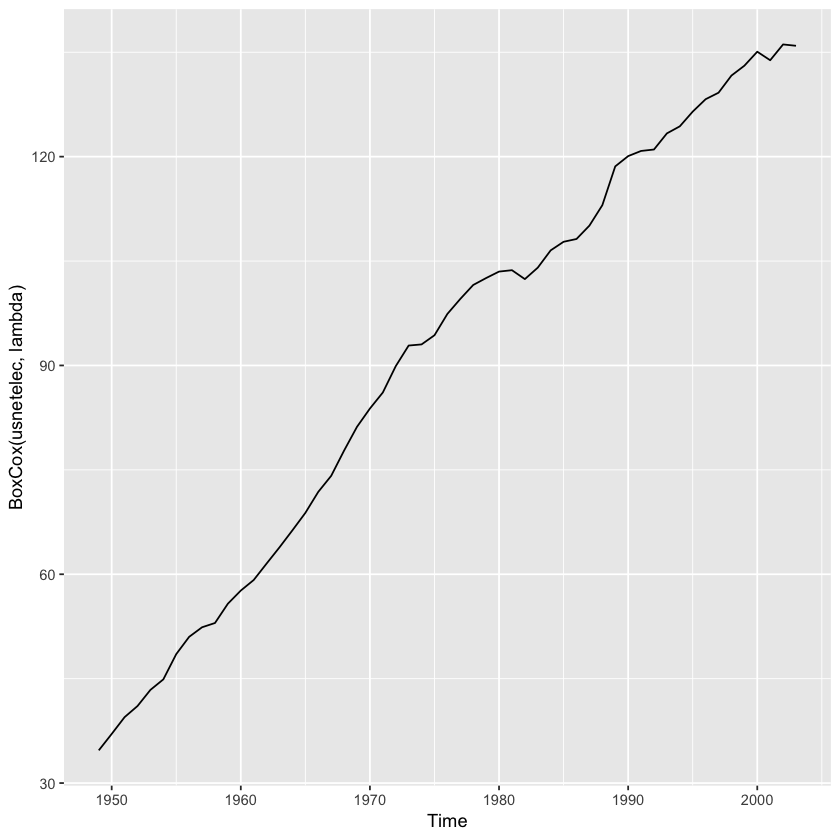

In [3]:
lambda <- BoxCox.lambda(usnetelec)
autoplot(BoxCox(usnetelec, lambda))
lambda

[1] 0.366352

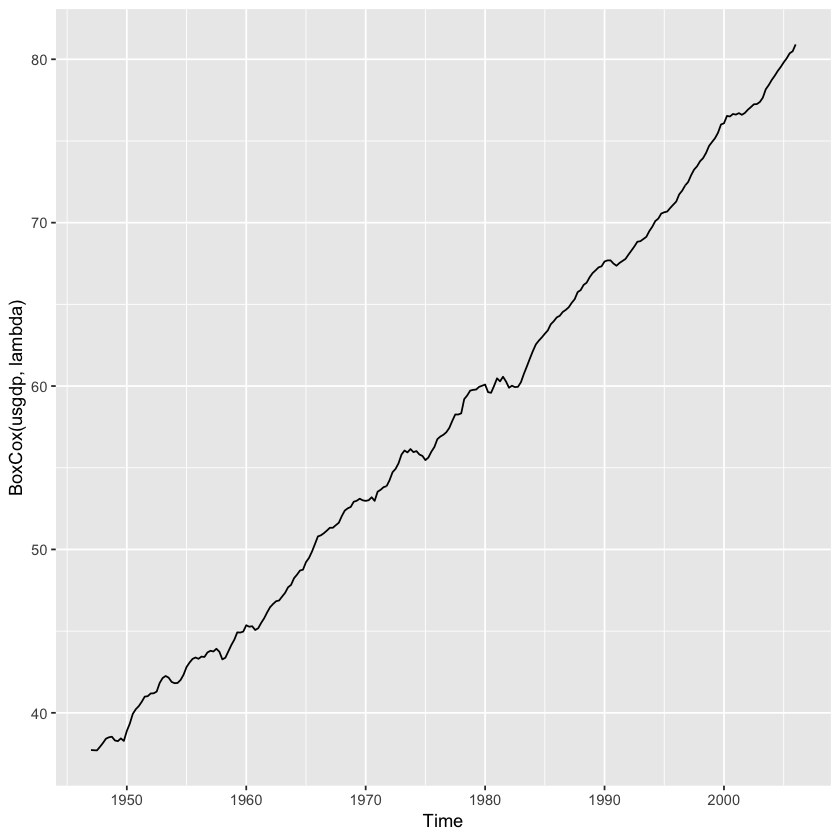

In [4]:
lambda <- BoxCox.lambda(usgdp)
autoplot(BoxCox(usgdp, lambda))
lambda

[1] 0.1919047

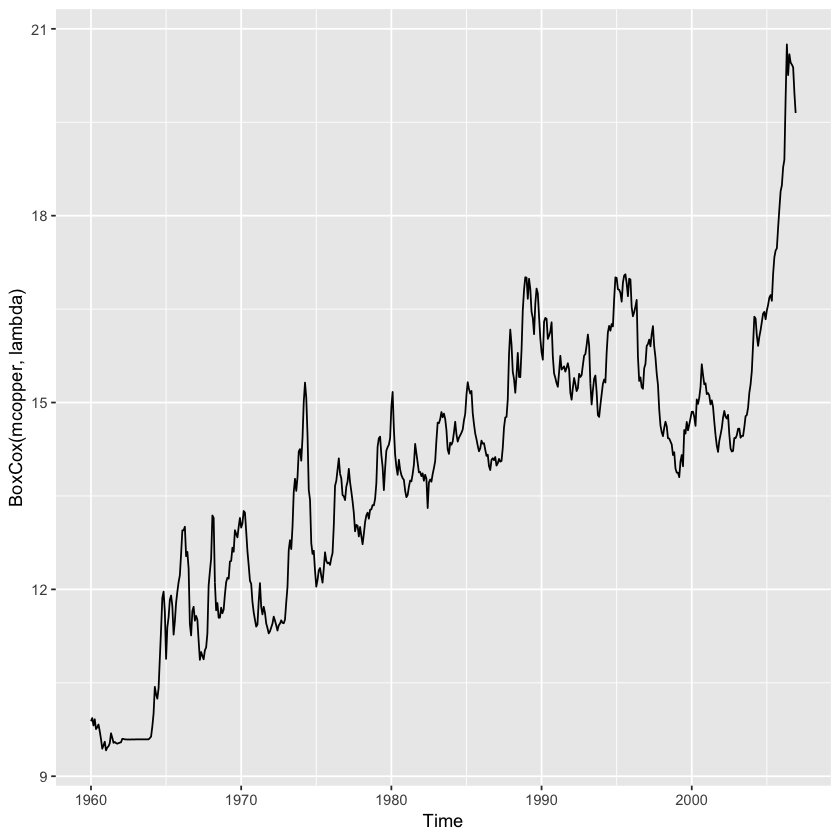

In [5]:
lambda <- BoxCox.lambda(mcopper)
autoplot(BoxCox(mcopper, lambda))
lambda

[1] -0.2269461

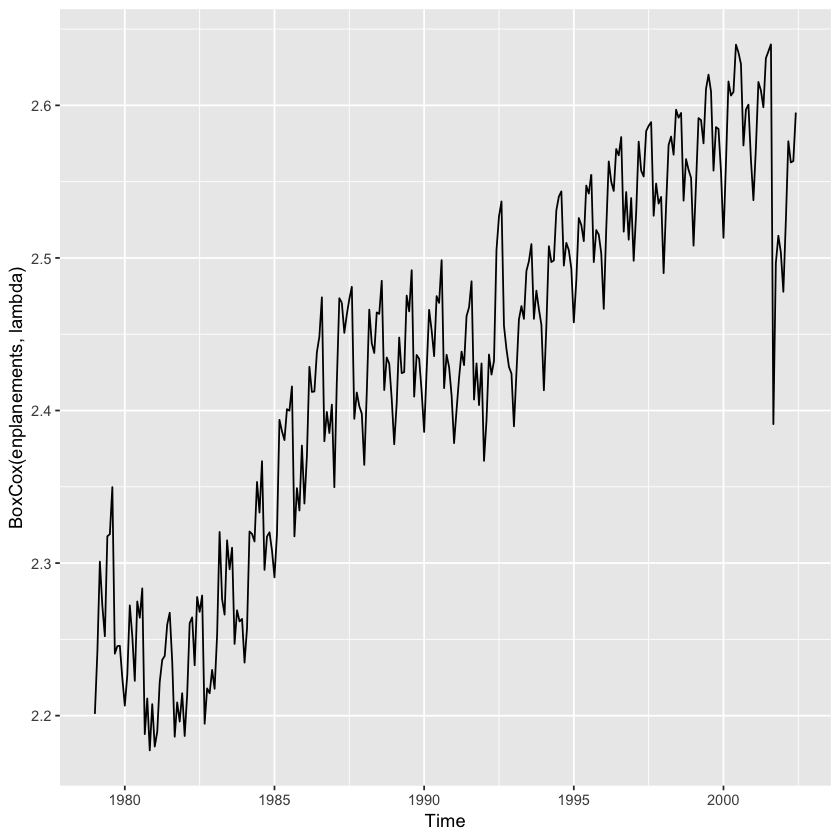

In [6]:
lambda <- BoxCox.lambda(enplanements)
autoplot(BoxCox(enplanements, lambda))
lambda


### Exercise 2

`help(cangas)`

Monthly Canadian gas production, billions of cubic metres, January 1960 - February 2005. 

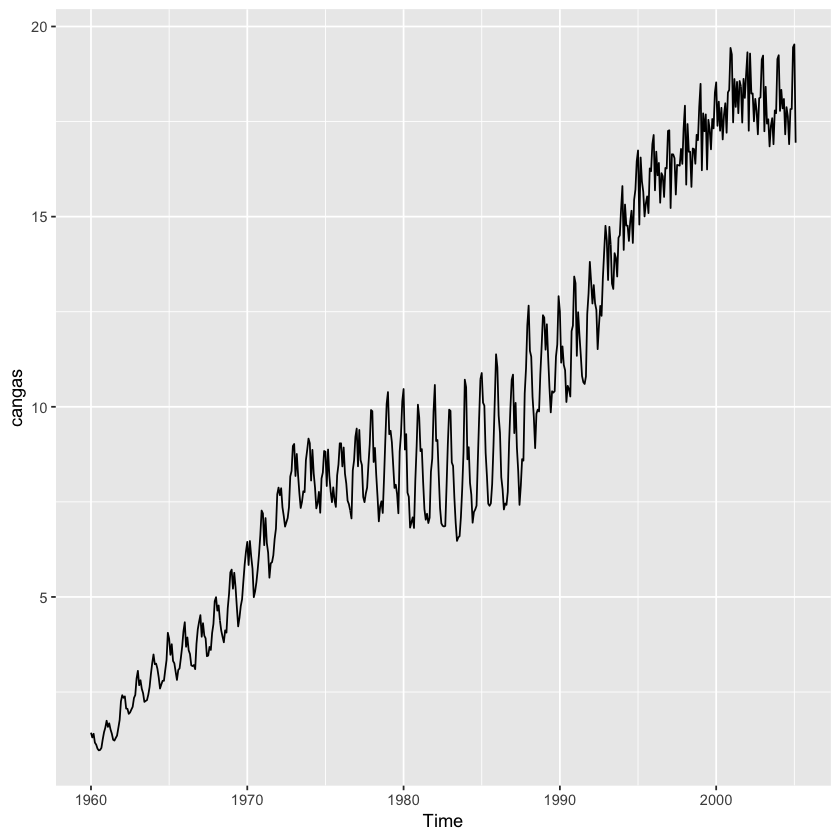

In [7]:
autoplot(cangas)

[1] 0.5767759

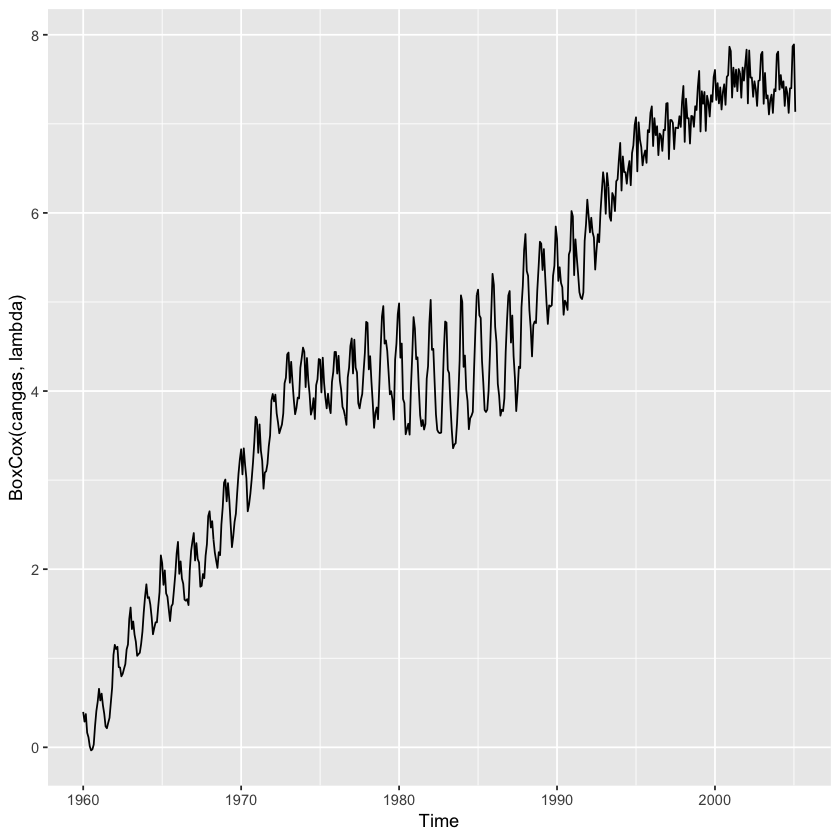

In [8]:
lambda <- BoxCox.lambda(cangas)
autoplot(BoxCox(cangas, lambda))
lambda

In [9]:
cangas

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1960,1.4306,1.3059,1.4022,1.1699,1.1161,1.0113,0.9660,0.9773,1.0311,1.2521,1.4419,1.5637
1961,1.7450,1.5835,1.6770,1.5155,1.4051,1.2464,1.2238,1.2917,1.3541,1.5552,1.7648,2.2549
1962,2.4164,2.3484,2.3852,2.0651,2.0594,1.9263,1.9631,2.0396,2.1104,2.3427,2.4220,2.8554
1963,3.0566,2.6798,2.8101,2.5863,2.4674,2.2407,2.2662,2.2889,2.4305,2.6345,2.9716,3.2577
1964,3.4872,3.2322,3.2464,3.1104,2.8838,2.5920,2.6996,2.7960,2.7960,3.0736,3.3399,4.0565
1965,3.9007,3.4787,3.7563,3.3172,3.2549,3.0311,2.8186,3.0792,3.1217,3.3937,3.6911,4.0990
1966,4.3342,3.6911,3.9347,3.5976,3.4985,3.2010,3.1812,3.2095,3.1019,3.7704,4.1500,4.3483
1967,4.5211,3.9546,4.3087,3.9829,3.9121,3.4418,3.4588,3.6855,3.6061,4.0509,4.2888,4.8894
1968,4.9942,4.6401,4.7761,4.3795,4.1160,3.9546,3.8073,4.1217,4.0622,4.7053,5.0848,5.6457
1969,5.7194,5.2180,5.6344,5.2520,4.7251,4.2265,4.4531,4.7619,4.9404,5.4135,5.8582,6.1981


> Why is a Box-Cox transformation `cangas` data? 

From the graphs, we see that the `autoplot()` graphs don't change from choosing the best lambda for the Box-Cox transformation. Since the Box-Cox transformation only transfers non-normal dependent variables into a normal shape, when the original data is not seasonal or normal, the transformation couldn't help with the irrelevance. 

If λ = 1, then $w_t = y_{t−1}$, so the transformed data is shifted downwards but there is no change in the shape of the time series. But for all other values of λ, the time series will change shape.

### Exercise 4 

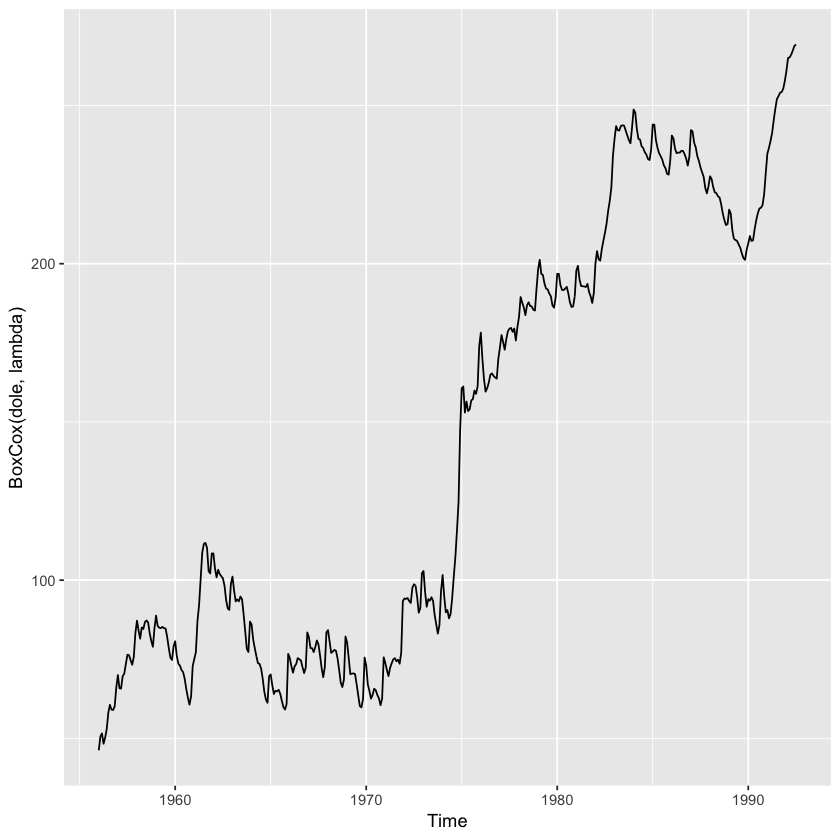

In [10]:
lambda <- BoxCox.lambda(dole)
autoplot(BoxCox(dole, lambda))

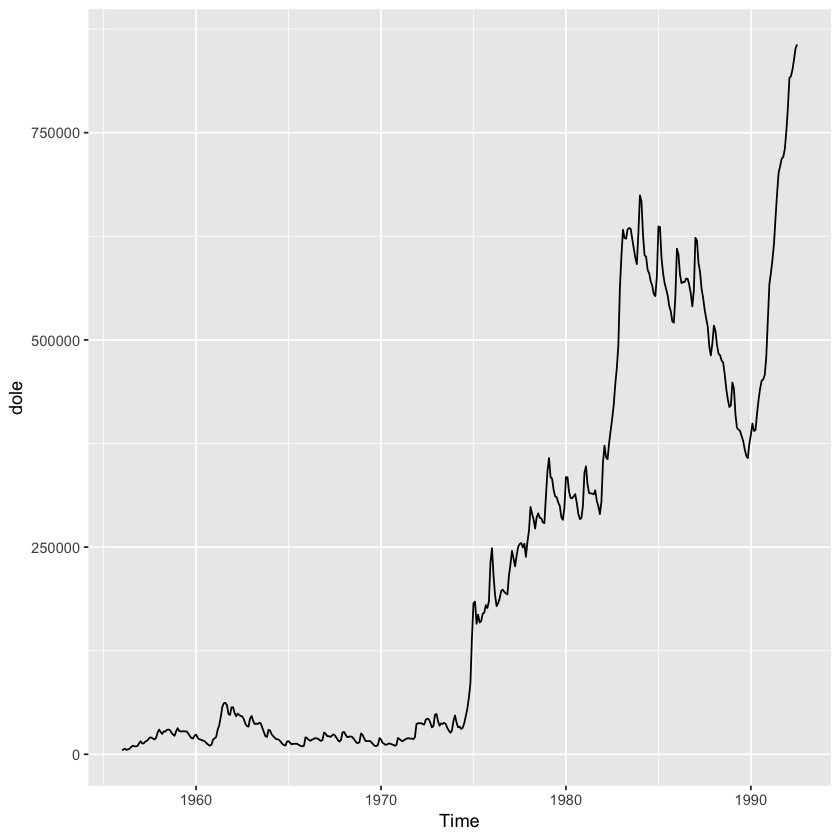

In [11]:
autoplot(dole)

`dole`: Box-Cox transformation takes 0.3291 as $\lambda$ and provides better seasonal trend in visidualization in a normal shape. 

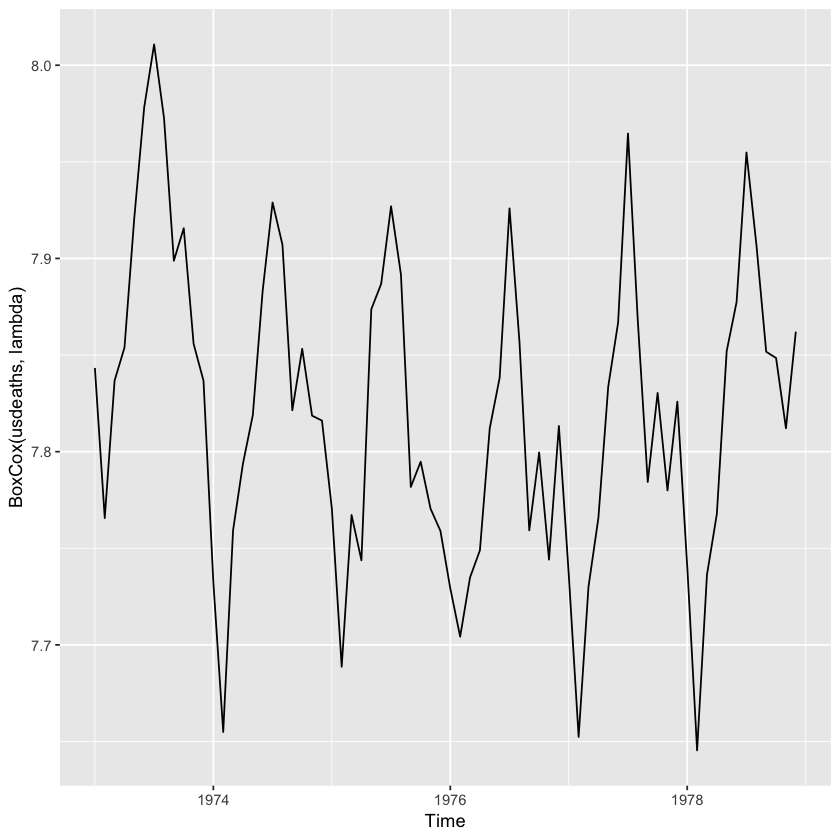

In [12]:
lambda <- BoxCox.lambda(usdeaths)
autoplot(BoxCox(usdeaths, lambda))

> `usdeaths`: Same as before without any Box-Cox transformation. 

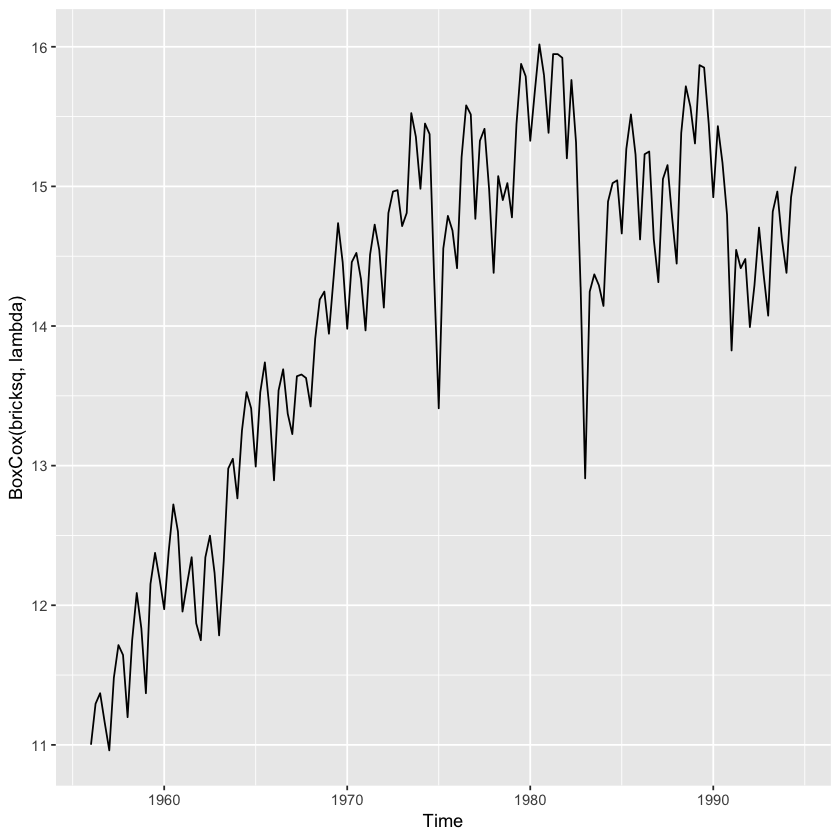

In [13]:
lambda <- BoxCox.lambda(bricksq)
autoplot(BoxCox(bricksq, lambda))

`bricksq`: Same as before without any Box-Cox transformation. Because the original dataset doesn't show a highly seasonal trend, the $(y_t^\lambda - 1)/\lambda$ transformation couldn't create a relationship. 

### Exercise 5 

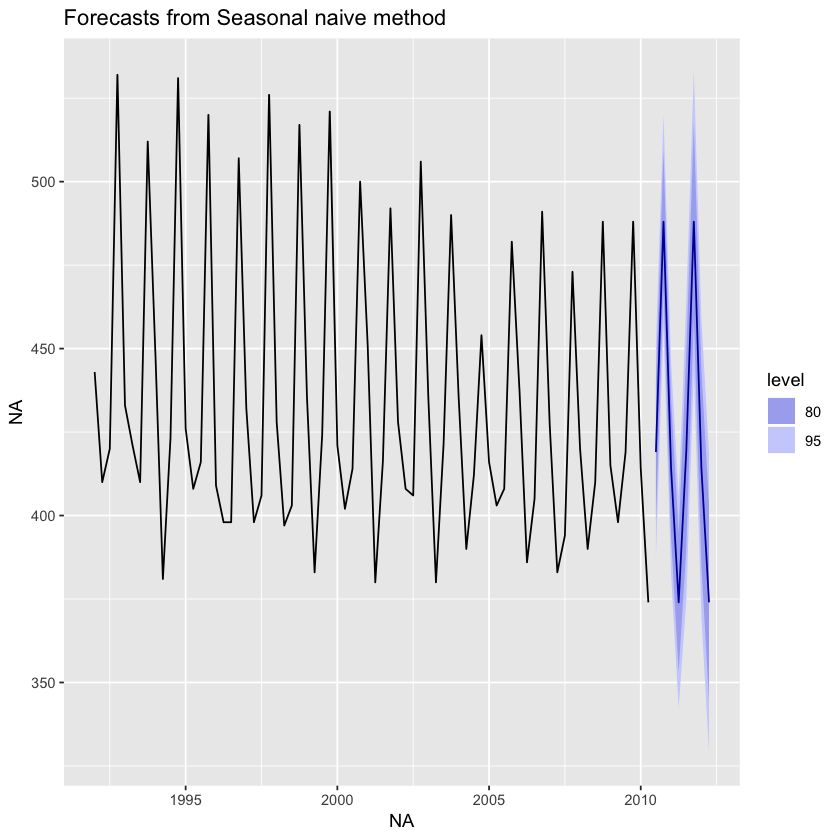

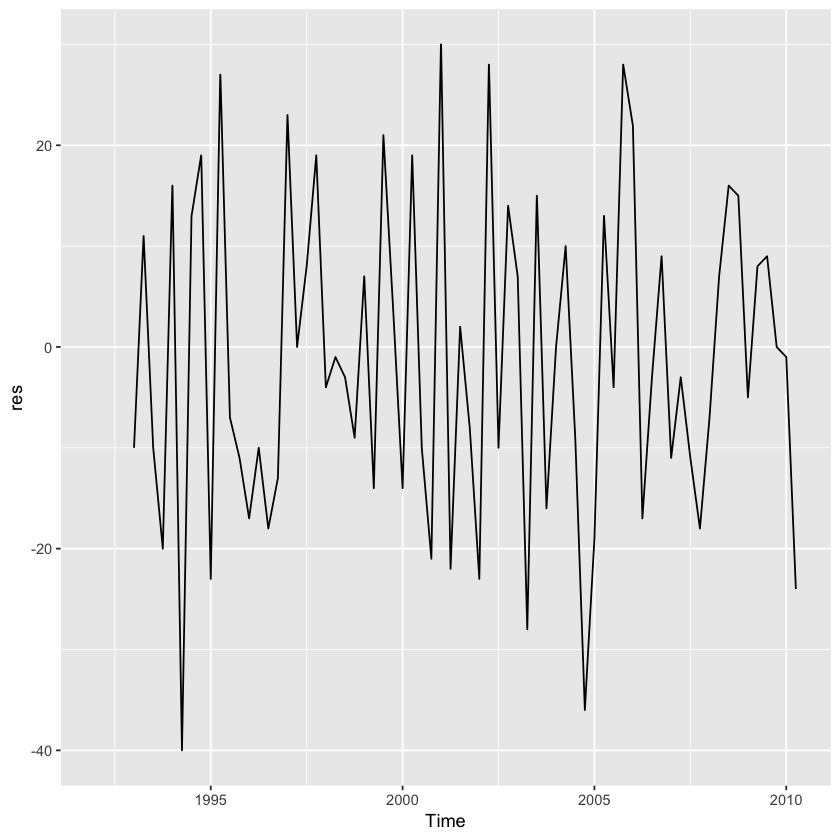

In [14]:
beer <- window(ausbeer, start = 1992)
fc <- snaive(beer)
autoplot(fc)
res <- residuals(fc)
autoplot(res)


	Ljung-Box test

data:  Residuals from Seasonal naive method
Q* = 32.269, df = 8, p-value = 8.336e-05

Model df: 0.   Total lags used: 8



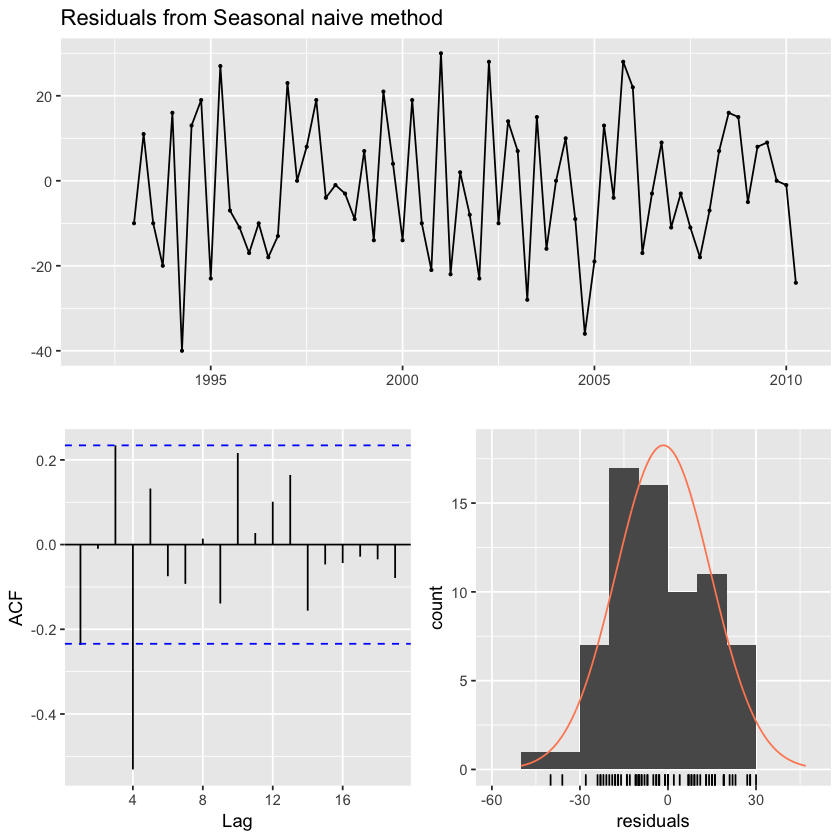

In [15]:
checkresiduals(fc)

I conclude that the seasonal naïve forecast might not be the appropriate approach for the quarterly Australian beer production data because the residuals are not normally distributed and splatted with white noise. First of all, the residuals are somehow moving around 0 but it seems more lying below the x-axis. Secondly, there shows the white noise around lag-4 in the ACF chart and residual graph is not a normal distribution. 

### Exercise 8

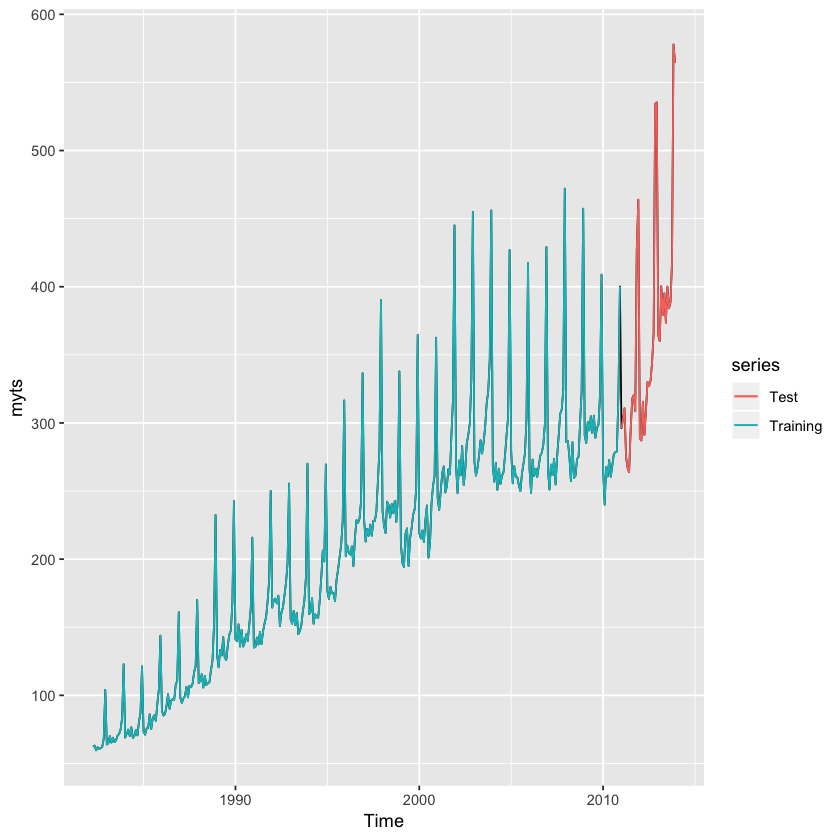

In [16]:
retaildata <- readxl::read_excel("/Users/apple/Desktop/bc_f19_econ/Forecasting/data/retail.xlsx", skip = 1)
myts <- ts(retaildata[,"A3349873A"], frequency=12, start=c(1982,4))

# split two parts 
myts.train <- window(myts, end = c(2010, 12))
myts.test <- window(myts, start = 2011)

autoplot(myts) + 
    autolayer(myts.train, series = "Training") + 
    autolayer(myts.test, series = "Test")

In [17]:
# simple naïve forecasts 
fc <- snaive(myts.train)

# compare accuracy ???
accuracy(fc, myts.test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,7.772973,20.24576,15.95676,4.702754,8.109777,1.000000,0.7385090,NA
Test set,55.300000,71.44309,55.78333,14.900996,15.082019,3.495907,0.5315239,1.297866



	Ljung-Box test

data:  Residuals from Seasonal naive method
Q* = 624.45, df = 24, p-value < 2.2e-16

Model df: 0.   Total lags used: 24



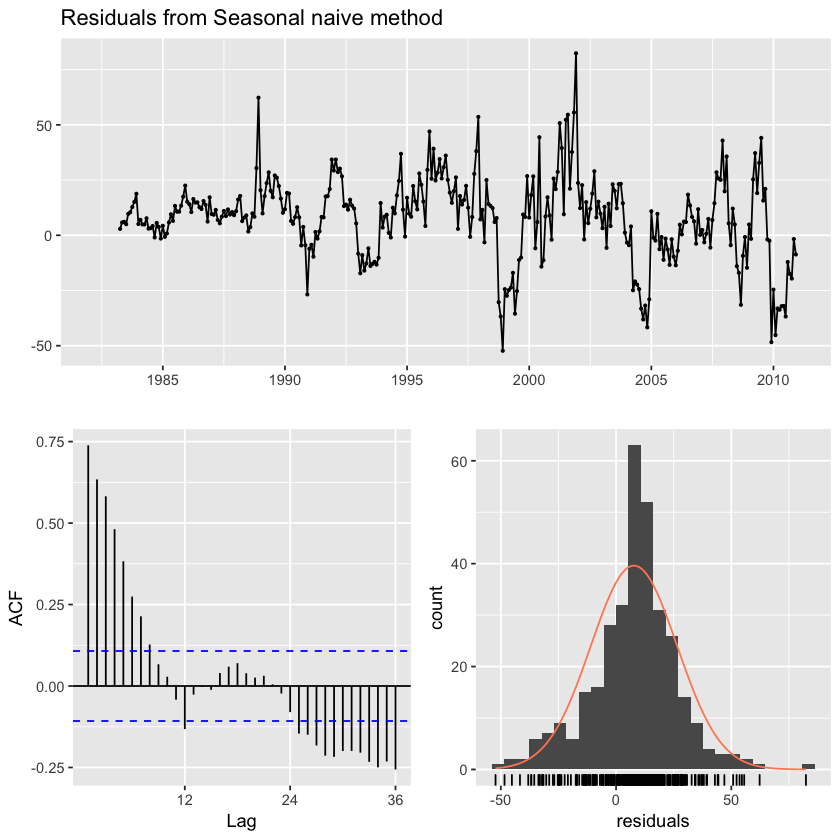

In [18]:
checkresiduals(fc)

#### e. 
The residuals are normally distributed but there is lots of white noise in the ACF graph, exceeding the higher and lower boundaries. 

#### f. 
> How sensitive are the accuracy measures to the training/test split? 

### Exercise 12 

In [19]:
hsales

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1973,55,60,68,63,65,61,54,52,46,42,37,30
1974,37,44,55,53,58,50,48,45,41,34,30,24
1975,29,34,44,54,57,51,51,53,46,46,46,39
1976,41,53,55,62,55,56,57,59,58,55,49,47
1977,57,68,84,81,78,74,64,74,71,63,55,51
1978,57,63,75,85,80,77,68,72,68,70,53,50
1979,53,58,73,72,68,63,64,68,60,54,41,35
1980,43,44,44,36,44,50,55,61,50,46,39,33
1981,37,40,49,44,45,38,36,34,28,29,27,29
1982,28,29,36,32,36,34,31,36,39,40,39,33


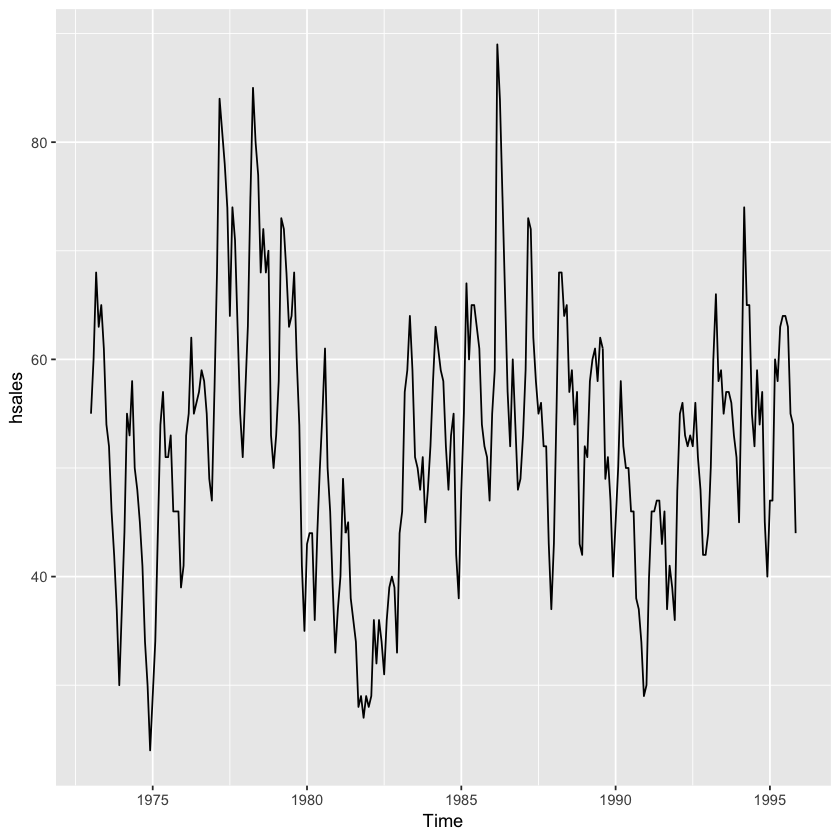

In [20]:
autoplot(hsales)

[1] 0.1454608

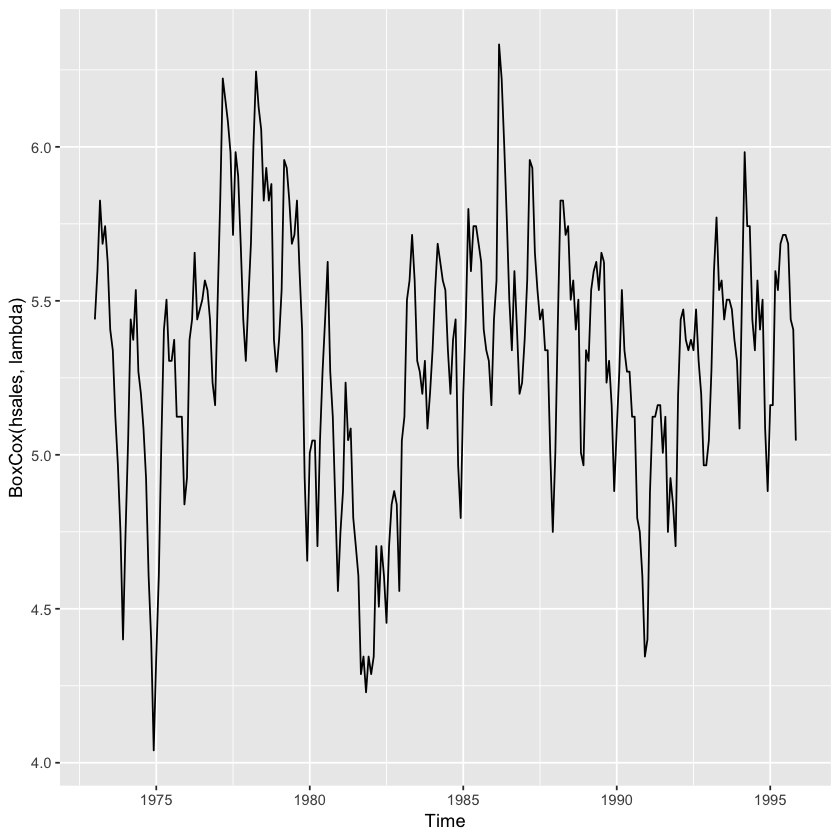

In [21]:
lambda <- BoxCox.lambda(hsales)
autoplot(BoxCox(hsales, lambda))
lambda

# Not a huge change 

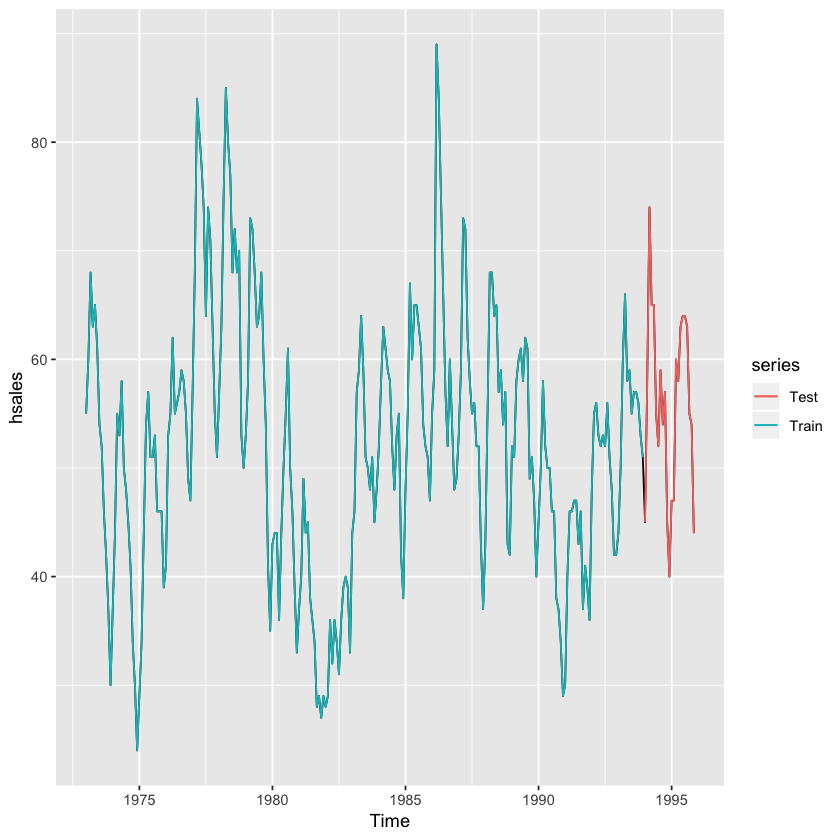

In [22]:
hsales.train <- window(hsales, end = c(1993, 12))
hsales.test <- window(hsales, start = 1994)

autoplot(hsales) + 
    autolayer(hsales.train, series = "Train") + 
    autolayer(hsales.test, series = "Test")

In [23]:
fc1 <- meanf(hsales.train)
fc2 <- naive(hsales.train)   # should be equivalent alternative to naive 
fc3 <- rwf(hsales.train)
fc4 <- snaive(hsales.train)
fc5 <- rwf(hsales.train, drift = TRUE)

In [24]:
identical(fc2, fc3)

all.equal(fc2, fc3)

[1] FALSE

[1] "Component “method”: 1 string mismatch"                                          
[2] "Component “model”: Component “call”: target, current do not match when deparsed"

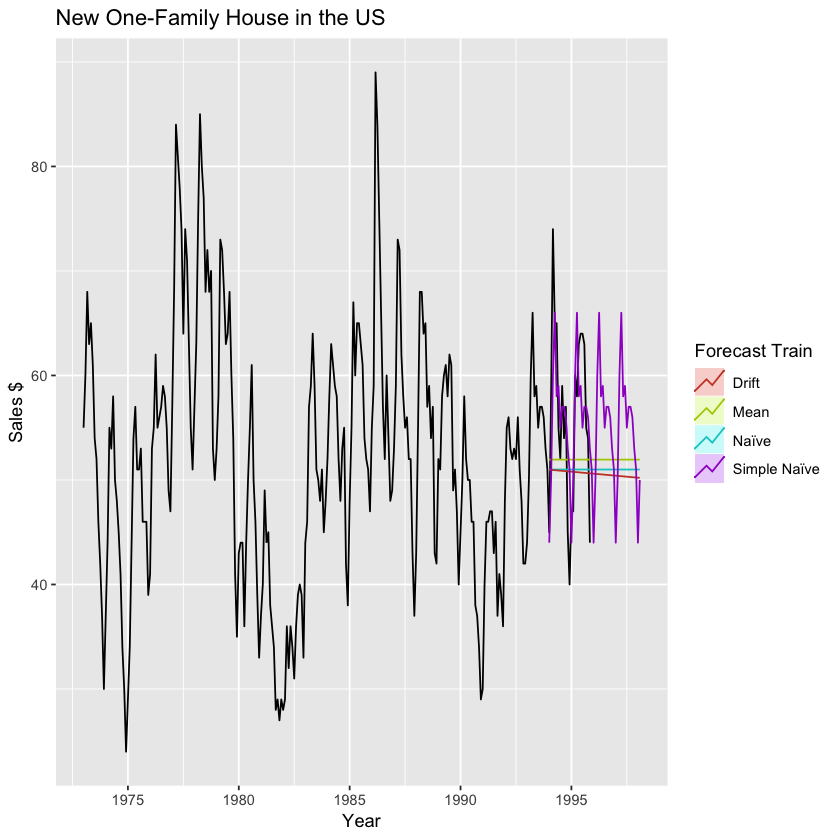

In [28]:
autoplot(hsales) + 
    autolayer(meanf(hsales.train, h = 50), 
              series = "Mean", PI = FALSE) + 
    autolayer(naive(hsales.train, h = 50), 
             series = "Naïve", PI = FALSE) + 
    autolayer(rwf(hsales.train, drift = TRUE, h = 50), 
             series = "Drift", PI = FALSE) + 
    autolayer(snaive(hsales.train, h = 50), 
             series = "Simple Naïve", PI = FALSE) + 
    ggtitle("New One-Family House in the US") + 
    xlab("Year") + ylab("Sales $") + 
    guides(color = guide_legend(title = "Forecast Train"))

From the comparison graph, it seems simple naïve works the best with prediction on train dataset against test set. Therefore, we choose `snaive()` and save fc4 as the final method. 

After checking the residuals of simple naïve method, we found that the residual graphs show normal distribution overall; however, there are lots of white noise exceeding the higher benchmark as well as the lower one on the ACF chart. Additionally, a lot of residual points splatter around 0, but more lying below the x-axis. Overall, all of the prediction methods we learned so far might not be a proper one to predict the house sales data. 


	Ljung-Box test

data:  Residuals from Seasonal naive method
Q* = 684.66, df = 24, p-value < 2.2e-16

Model df: 0.   Total lags used: 24



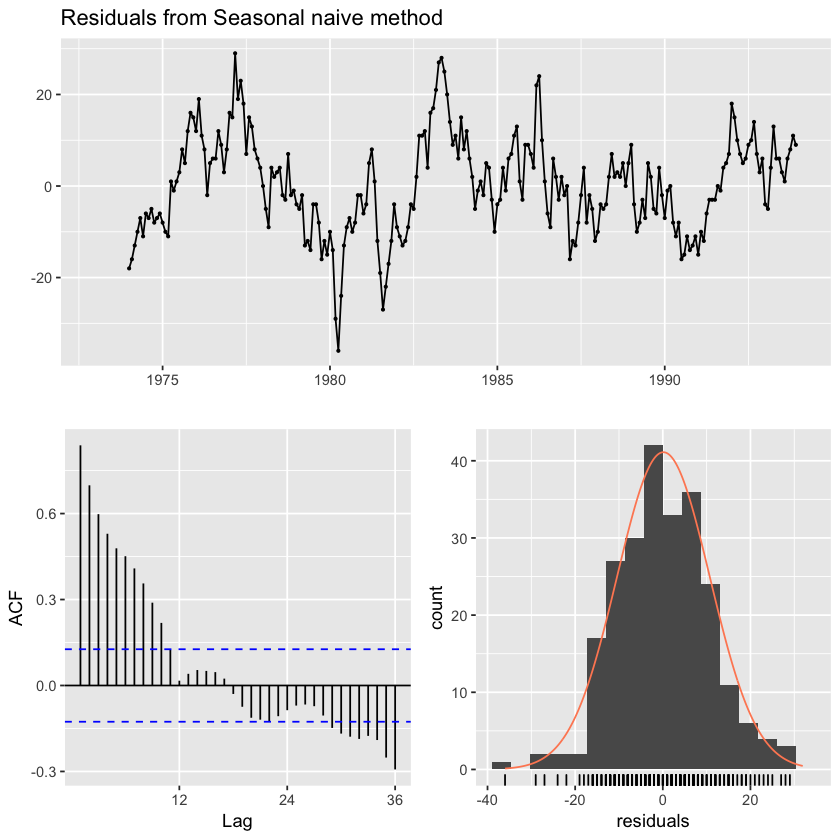

In [29]:
checkresiduals(fc4)